## 1. Cargando la **Data COVID**
Origen de datos **Plataforma de Datos Abiertos** [Fallecidos por COVID-19 (Ministerio de Salud - MINSA)](https://www.datosabiertos.gob.pe/dataset/fallecidos-por-covid-19-ministerio-de-salud-minsa). *Actualizado al 04/03/2023*

In [ ]:
import pandas as pd

url='https://drive.google.com/file/d/11c5NdVLXrr9c6ZMDsNWuCVhxVMfqNEF-/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(dwn_url, encoding = 'utf-8', sep=';')

df.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(219478, 10)

In [ ]:
df.head()

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20230301,20210512,88.0,FEMENINO,Criterio SINADEF,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889730.0
1,20230301,20210624,58.0,MASCULINO,Criterio SINADEF,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889749.0
2,20230301,20210426,84.0,MASCULINO,Criterio serolÃ³gico,LA LIBERTAD,SANCHEZ CARRION,CHUGAY,130902,13889932.0
3,20230301,20210315,64.0,MASCULINO,Criterio virolÃ³gico,LA LIBERTAD,SANTIAGO DE CHUCO,CACHICADAN,131003,13889956.0
4,20230301,20210504,62.0,MASCULINO,Criterio SINADEF,LIMA,HUARAL,CHANCAY,150605,13890034.0


### 1.1 Limpieza de Datos

In [ ]:
# Realizando las correcciones de tildes de los Clasificadores de Defunsión
df.groupby(['CLASIFICACION_DEF']).count()['FECHA_CORTE']

CLASIFICACION_DEF
Criterio SINADEF                           66179
Criterio clÃ­nico                           9541
Criterio investigaciÃ³n EpidemiolÃ³gica    10788
Criterio nexo epidemiolÃ³gico               2216
Criterio radiolÃ³gico                       5113
Criterio serolÃ³gico                       42912
Criterio virolÃ³gico                       82729
Name: FECHA_CORTE, dtype: int64

In [ ]:
df['CLASIFICACION_DEF'] = df['CLASIFICACION_DEF'].apply(lambda x: 'Criterio clinico' if (x=='Criterio clÃ­nico') else x)
df['CLASIFICACION_DEF'] = df['CLASIFICACION_DEF'].apply(lambda x: 'Criterio investigacion epidemiologica' if (x=='Criterio investigaciÃ³n EpidemiolÃ³gica') else x)
df['CLASIFICACION_DEF'] = df['CLASIFICACION_DEF'].apply(lambda x: 'Criterio nexo epidemiologico' if (x=='Criterio nexo epidemiolÃ³gico') else x)
df['CLASIFICACION_DEF'] = df['CLASIFICACION_DEF'].apply(lambda x: 'Criterio radiologico' if (x=='Criterio radiolÃ³gico') else x)
df['CLASIFICACION_DEF'] = df['CLASIFICACION_DEF'].apply(lambda x: 'Criterio serologico' if (x=='Criterio serolÃ³gico') else x)
df['CLASIFICACION_DEF'] = df['CLASIFICACION_DEF'].apply(lambda x: 'Criterio virologico' if (x=='Criterio virolÃ³gico') else x)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219478 entries, 0 to 219477
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FECHA_CORTE          219478 non-null  int64  
 1   FECHA_FALLECIMIENTO  219478 non-null  int64  
 2   EDAD_DECLARADA       219474 non-null  float64
 3   SEXO                 219478 non-null  object 
 4   CLASIFICACION_DEF    219478 non-null  object 
 5   DEPARTAMENTO         219478 non-null  object 
 6   PROVINCIA            219473 non-null  object 
 7   DISTRITO             219473 non-null  object 
 8   UBIGEO               219478 non-null  object 
 9   UUID                 216814 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 16.7+ MB


In [ ]:
df['FECHA_FALLECIMIENTO'] = df['FECHA_FALLECIMIENTO'].astype(str)

In [ ]:
dfCovid = df.copy()
dfCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219478 entries, 0 to 219477
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FECHA_CORTE          219478 non-null  int64  
 1   FECHA_FALLECIMIENTO  219478 non-null  object 
 2   EDAD_DECLARADA       219474 non-null  float64
 3   SEXO                 219478 non-null  object 
 4   CLASIFICACION_DEF    219478 non-null  object 
 5   DEPARTAMENTO         219478 non-null  object 
 6   PROVINCIA            219473 non-null  object 
 7   DISTRITO             219473 non-null  object 
 8   UBIGEO               219478 non-null  object 
 9   UUID                 216814 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 16.7+ MB


## 2. Análisis por Clasificación de Defunsión en el Tiempo

In [ ]:
dfCovid.head()

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20230301,20210512,88.0,FEMENINO,Criterio SINADEF,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889730.0
1,20230301,20210624,58.0,MASCULINO,Criterio SINADEF,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889749.0
2,20230301,20210426,84.0,MASCULINO,Criterio serologico,LA LIBERTAD,SANCHEZ CARRION,CHUGAY,130902,13889932.0
3,20230301,20210315,64.0,MASCULINO,Criterio virologico,LA LIBERTAD,SANTIAGO DE CHUCO,CACHICADAN,131003,13889956.0
4,20230301,20210504,62.0,MASCULINO,Criterio SINADEF,LIMA,HUARAL,CHANCAY,150605,13890034.0


In [ ]:
# Agrupando por AÑO/MES la cantidad de fallecidos
dfCovid['FECHA_YM'] = dfCovid['FECHA_FALLECIMIENTO'].apply(lambda x:x[0:6] if(len(x)==8) else '')

# Conteno de fallecidos por Clasificación en el tiempo
dfClasificacion = pd.crosstab(dfCovid.FECHA_YM, dfCovid.CLASIFICACION_DEF)
dfClasificacion.head()

CLASIFICACION_DEF,Criterio SINADEF,Criterio clinico,Criterio investigacion epidemiologica,Criterio nexo epidemiologico,Criterio radiologico,Criterio serologico,Criterio virologico
FECHA_YM,,,,,,,
202003,35,52,25,2,7,2,58
202004,1792,543,499,68,182,778,1273
202005,6823,1154,1427,203,480,3233,3043
202006,5722,670,1707,251,391,5604,3117
202007,5011,609,1512,262,415,7503,3190


In [ ]:
fechas = dfClasificacion.index.tolist()
print(fechas)

['202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201', '202202', '202203', '202204', '202205', '202206', '202207', '202208', '202209', '202210', '202211', '202212', '202301', '202302', '202303']


In [ ]:
dfClasificacion_dic = dfClasificacion.to_dict('list')
valores = dfClasificacion_dic.values()
valores

dict_values([[35, 1792, 6823, 5722, 5011, 4590, 1984, 1093, 704, 801, 2190, 4993, 6097, 7450, 5225, 2726, 1025, 580, 556, 469, 444, 589, 1898, 1605, 352, 130, 85, 80, 299, 403, 153, 56, 53, 155, 5, 6, 0], [52, 543, 1154, 670, 609, 610, 476, 463, 462, 549, 514, 501, 527, 750, 628, 114, 113, 75, 12, 12, 17, 8, 22, 20, 6, 9, 3, 3, 3, 6, 12, 57, 0, 0, 541, 0, 0], [25, 499, 1427, 1707, 1512, 1459, 755, 469, 307, 171, 323, 465, 517, 591, 349, 123, 67, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 68, 203, 251, 262, 209, 105, 50, 37, 41, 107, 150, 229, 246, 155, 51, 35, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [7, 182, 480, 391, 415, 534, 233, 172, 186, 179, 434, 556, 456, 363, 283, 138, 68, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 778, 3233, 5604, 7503, 7398, 3483, 1417, 867, 1048, 2449, 2539, 1703, 1488, 1175, 746, 523, 287, 190, 148, 157, 132, 41, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [58, 1273, 3043, 3117, 3190, 2869, 

In [ ]:
keyList = dfClasificacion.to_dict('list').keys()
keyList

dict_keys(['Criterio SINADEF', 'Criterio clinico', 'Criterio investigacion epidemiologica', 'Criterio nexo epidemiologico', 'Criterio radiologico', 'Criterio serologico', 'Criterio virologico'])

<ipython-input-85-11f908d0744d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fechas, rotation=90)


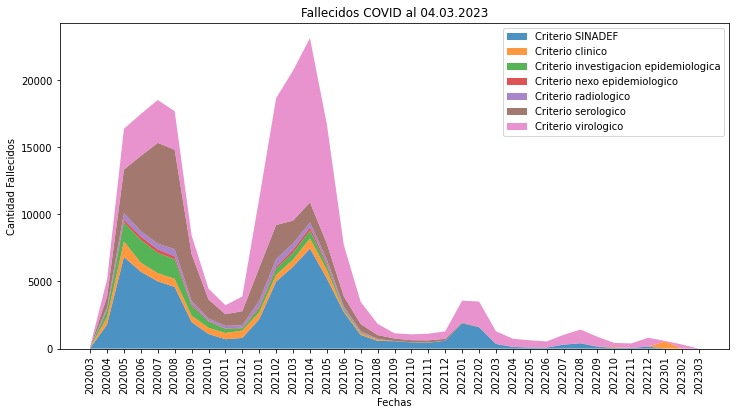

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.stackplot(fechas, valores, labels = keyList, alpha=0.8)

ax.legend(loc='upper right')
ax.set_title('Fallecidos COVID al 04.03.2023')
ax.set_xlabel('Fechas')
ax.set_ylabel('Cantidad Fallecidos')

ax.set_xticklabels(fechas, rotation=90)

plt.show()

## 3. Fallecimiento por Edades en el Tiempo

In [ ]:
dfCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219478 entries, 0 to 219477
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FECHA_CORTE          219478 non-null  int64  
 1   FECHA_FALLECIMIENTO  219478 non-null  object 
 2   EDAD_DECLARADA       219474 non-null  float64
 3   SEXO                 219478 non-null  object 
 4   CLASIFICACION_DEF    219478 non-null  object 
 5   DEPARTAMENTO         219478 non-null  object 
 6   PROVINCIA            219473 non-null  object 
 7   DISTRITO             219473 non-null  object 
 8   UBIGEO               219478 non-null  object 
 9   UUID                 216814 non-null  float64
 10  FECHA_YM             219478 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 18.4+ MB


In [ ]:
dfCovid['EDAD_DECLARADA'] = dfCovid['EDAD_DECLARADA'].astype(str)
dfCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219478 entries, 0 to 219477
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FECHA_CORTE          219478 non-null  int64  
 1   FECHA_FALLECIMIENTO  219478 non-null  object 
 2   EDAD_DECLARADA       219478 non-null  object 
 3   SEXO                 219478 non-null  object 
 4   CLASIFICACION_DEF    219478 non-null  object 
 5   DEPARTAMENTO         219478 non-null  object 
 6   PROVINCIA            219473 non-null  object 
 7   DISTRITO             219473 non-null  object 
 8   UBIGEO               219478 non-null  object 
 9   UUID                 216814 non-null  float64
 10  FECHA_YM             219478 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 18.4+ MB


In [ ]:
# Eliminamos el DECIMAL de la EDAD
dfCovid['EDAD_DECLARADA'] = dfCovid['EDAD_DECLARADA'].apply(lambda x: x.split('.')[0] if(len(x.split('.'))>1) else x)

In [ ]:
dfCovid.dropna(subset=['EDAD_DECLARADA'], inplace=True)

In [ ]:
row_nan_index = dfCovid[dfCovid.EDAD_DECLARADA=='nan'].index.tolist()
print(row_nan_index)

[20428, 48307, 53857, 90719]


In [ ]:
dfCovid.drop(row_nan_index, inplace=True)

In [ ]:
dfCovid['EDAD_DECLARADA'] = dfCovid['EDAD_DECLARADA'].astype(int)
dfCovid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219474 entries, 0 to 219477
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FECHA_CORTE          219474 non-null  int64  
 1   FECHA_FALLECIMIENTO  219474 non-null  object 
 2   EDAD_DECLARADA       219474 non-null  int64  
 3   SEXO                 219474 non-null  object 
 4   CLASIFICACION_DEF    219474 non-null  object 
 5   DEPARTAMENTO         219474 non-null  object 
 6   PROVINCIA            219469 non-null  object 
 7   DISTRITO             219469 non-null  object 
 8   UBIGEO               219474 non-null  object 
 9   UUID                 216810 non-null  float64
 10  FECHA_YM             219474 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 20.1+ MB


In [ ]:
dfEdad = dfCovid.groupby(['EDAD_DECLARADA'])['EDAD_DECLARADA'].count()
dfEdad = dfEdad.to_frame()
dfEdad.columns = ['CANTIDAD']
dfEdad.reset_index(inplace=True)
dfEdad.sort_values(by=['EDAD_DECLARADA'], inplace=True)
dfEdad

,EDAD_DECLARADA,CANTIDAD
0,0,250
1,1,192
2,2,102
3,3,66
4,4,71
...,...,...
108,108,7
109,109,2
110,110,2
111,113,2


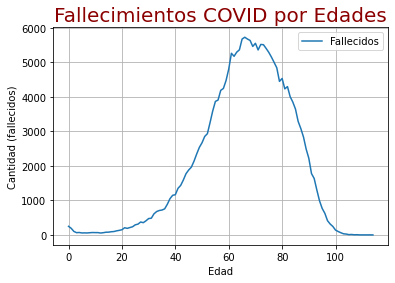

In [ ]:
import matplotlib.pyplot as plt

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

# Re-sizing plot area
f = plt.figure()
#f.set_figwidth(15)
#f.set_figheight(10)

# Adding a title and axis text
plt.title("Fallecimientos COVID por Edades", fontdict=font) # UPDATE: pass our dict as parameter
plt.xlabel("Edad")
plt.ylabel("Cantidad (fallecidos)")


plt.plot(dfEdad.EDAD_DECLARADA.tolist(), dfEdad.CANTIDAD.tolist(), label='Fallecidos')
#plt.plot(datoEdad.index.tolist(), datoEdad.F.tolist(), label='Mujeres')

# add a legend (automatically)
plt.legend()

# adding grid
plt.grid(True)

# display
plt.show()

In [ ]:
cond_menores10 = dfCovid['EDAD_DECLARADA']<11
dfCovid_m10 = dfCovid[cond_menores10]

In [ ]:
dfCovid_m10.head()

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID,FECHA_YM
1517,20230301,20210408,1,MASCULINO,Criterio SINADEF,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133,14341040.0,202104
3436,20230301,20210823,9,MASCULINO,Criterio serologico,JUNIN,CHANCHAMAYO,PICHANAQUI,120303,15210481.0,202108
5326,20230301,20210718,4,FEMENINO,Criterio virologico,LIMA,LIMA,SAN MARTIN DE PORRES,150135,15759917.0,202107
5679,20230301,20211106,10,FEMENINO,Criterio virologico,CAJAMARCA,HUALGAYOC,BAMBAMARCA,060701,15845187.0,202111
6358,20230301,20210722,7,MASCULINO,Criterio SINADEF,LAMBAYEQUE,CHICLAYO,CHICLAYO,140101,16013447.0,202107


In [ ]:
dfCovid_m10_tiempo = dfCovid_m10.groupby(['FECHA_YM'])['FECHA_YM'].count().to_frame()
dfCovid_m10_tiempo.columns = ['CANTIDAD']
dfCovid_m10_tiempo.reset_index(inplace=True)
dfCovid_m10_tiempo.head()

In [ ]:
import plotly.express as px

fig = px.line(dfCovid_m10_tiempo, x='FECHA_YM', y=dfCovid_m10_tiempo.columns, 
              hover_data={'FECHA_YM':'|%B %d, %Y'}, template = 'plotly_dark',
              title='Fallecidos COVID Menores 10 años')
fig.update_xaxes(
    dtick='M1',
    tickformat='%b\n%Y',
    ticklabelmode='period')

fig.show()